In [40]:
import time
import matplotlib.pyplot as plt
import numpy as np
import random
import timeit

# Notes

## Algorithms 

<div class="alert alert-block alert-info">
<i>Well-defined computational procedure that achieves a specifies task</i>
</div>

Takes as input an *instance* of a computational problem, and gives as output some solution. To be correct, should work (produce desired output) for all *instances*. The correctness of an algorithm can be ascertained using a formal proof, using axioms, assumptions, and deductive reasoning (not just test cases - unless there is a finite amount of inputs - proof by exhaustion). To prove an algorithm's *incorrectness*, a counterexample can be used. 

Problem must be general and well-specified; set of all possible inputs, their properties, and desired outputs.

**e.g. Sorting problem**

Input: an array A of objects of length *n* and a function $\leq$ to compare two objects. 
Output: an array A' which contains the same objects as A, but ordered such that $A'[0]\leq A'[1]\leq...\leq A'[n-1]$.

**e.g. Tour optimisation**

Input: a set of points which must be traversed completely in minimum time/distance. *Nearest neighbour tour* is as follows:
```Begin at some p_0
p=p_0
i=0
While there are still unvisited points
    i = i+1
    Let p_i be closest unvisited point to p_{i-1}
    Visit p_i
Return to p_0 from p_i
```

This is not a correct algorithm (e.g. take points in a line, if it starts at the middle, it will 'jump around').

*Closest pair tour*:
````Let n be no. of points in set
From i = 1 to n-1 do
    d = inf
    for each pair of endpoints (x, y) of partial paths
        If dist(x, y) <= d then
            x_m=x, y_m=y, d=dist(x,y)
    Connect x_m, y_m by an edge
Connect the two endpoints by an edge.
````

This is also not correct (e.g. take points in a rectangle, depending on which pairs it chooses, it may end up with the endpoints being diagonal from one another, which is inefficient). 

A correct, but very time-consuming, algorithm is *exhaustive search*:

$d=\inf$

For each of the $n!$ permutations $\Pi_i$ of the $n$ points:  
&emsp;&emsp;&emsp;&emsp; If $cost(\Pi_i)\leq d$ then  
&emsp;&emsp;&emsp;&emsp;  $d=cost(\Pi_i)$ and $P_{min}=\Pi_i$  
Return $P_{min}$

This is factorial runtime, and is not feasible for more than 10-20 pairs. 


## Analysis

### RAM model

It is also desirable for an algorithm to be *scalable* (efficient in time, space/memory, and other parameters such as power consumption), and for it to be general, simple, and elegant. The *RAM (Random Access Memory) model of computation* is used to analyse an algorithm. It assumes
- Accessing any memory cell takes constant time ```numbers[i]```, `len(numbers)`
- Basic operations (arithmetic, simple comparisons, simple assignments) `c = a+b`, `x <= 0`
- Loops take time proportional to the number of times they iterate `for s in numbers: s += x`. (Note here that if `numbers` is the input to the function, this is $O(n)$; if `numbers` is some hardcoded variable, this is $O(1)$.)
- The time a subroutine call takes is equal to the time it takes to execute its body (e.g. `sum(numbers)` takes `len(numbers)`)

### Time functions

Let $\chi$ be all possible inputs, $size:\chi\rightarrow \N$ be a function mapping an input to its size, $time:\chi \rightarrow \N$ be a function mapping an input to the time, or number of steps, the algorithm takes on that input.

The *worst-case* time function, $T_{WC}(n)$, can be defined as the maximum $time(x)$ for any input $x$ belonging to $\chi$ with $size(x)=n$. (So this function is a function of the size of the input, not a particular input. It is the performance given the 'worst possible input', so to speak.)

Conversely, the *best-case* time function, $T_{BC}(n)$, can be defined as the minimum $time(x)$ for any input $x$ belonging to $\chi$ with $size(x)=n$. (Similarly, this is the performance given the 'best possible input'.)

Finally, the average case time function, $T_{AC}(n)$, is a sum of runtimes across all inputs of size $n$, weighted by the probability of each input $x$ (i.e. sum of $P(x|size(x)=n)\cdot time(x)$). This is difficult to obtain in practise because the input distribution $P$ is often unknown and must be assumed or estimated, so average-case analysis is not as useful as the other two. Worst-case is usually the one we are most interested in. 

### Asymptotic notation

The exactly time complexity of an algorithm can have too many unnecessary details and can be too complicated to analytically obtain; not to mention that the difference between machines and languages is great enough to make particular coefficients arbitrary. Asymptotic notation (big $O$ notation) is used, which ignores multiplicative constants and lower-order terms. 

$O(g)={f|\exists c>0: \exists x_0 : \forall x \geq x_0: 0 \leq f(x) \leq cg(x)}$ is the set of all functions that grow **at most** as fast as $g$ (i.e. $g$ is an asymptotic upper bound for them - given a great enough $x$, and a great enough $c$ to multiply $g$ by, $f$ is always less than or equal to $g$. The $c$ can be thought of as being there to account for the 'equals' part - for example, a linear function $f(x)=3x+5$ will never be less than or equal to $g(x)=x$, but for very large $x$ the functions are pretty much the same; hence they grow at essentially the same rate). In the 'scale' of functions, you are drawing an arrow starting at $g$ and going down. 

$\Omega(g)=f|\exists c>0: \exists x_0: \forall x \geq x_0: 0 \leq c g(x) \leq f(x)$ is the set of all functions that grow **at least** as fast as $g$. $g$ is an asymptotic lower bound. In the scale of functions, you are drawing an arrow starting at $g$ and going up.

$\Theta(g)=O(g)\cap \Omega(g)$ is the set of all functions that grow **as fast** as $g$, i.e. $g$ is both an asymptotic lower and an asymptotic upper bound for them. 

Note that $f\in O(g) \iff g \in \Omega(f)$ and $f \in \Theta(g) \iff g \in \Theta(f)$. Also, $O(g)$ and the like are sets; it is correct to write $T(n)\in O(n^2)$, not $T(n)=O(n^2)$, and $n^2 + f(n):f(n)\in  \Theta(n)$, not $n^2+\Theta(n)$. Finally, $O(1) \subset O(\log n ) \subset O(n) ... \subset O(n!)$ and likewise $\Omega(1) \supset \Omega(\log n) \supset \Omega(n) ... \supset \Omega(n!)$. 

### Putting it all together

Going back to worst, best, and average case:
- Think of a graph with x being input size and y being runtime, with worst-case as a line at the top, best-case as a line at the bottom, and average-case as a line in the middle. These may all be one line, or they may be different.     
- $O \neq T_{WC}$, $\Omega \neq T_{BC}$, $\Theta \neq T_{AC}$. For example, a function may be $O(n^2)$, but have T(n) = 50n + 5. In this case the $O(n^2)$ doesn't provide us much useful information; it just tells us that $n^2$ is an *upper bound* for the asymptotic time complexity. It is more useful to have a *tight bound*, expressed using $\Theta$. The tight bound can be for any of the time functions - worst, best, or average case. 

### Time complexity of operations in Python

| Operation | Description | Complexity |
| --- | --- | --- |
| $=$ | simple assignment | $\Theta(1)$ |
| $+,-,*,/,//,abs$ | simple arithmetic operations (on small numbers) | $\Theta(1)$ |
| `list[i]` | read or write a single element | $\Theta(1)$ |
| `len(list)` | Python keeps track of the length | $\Theta(1)$ |
| `list[:k]` | Where the length of the slice is $k$ (makes a copy of the first $k$ items) | $\Theta(k)$ |
| `list.copy()` | See above | $\Theta(n)$ |
| `list.append(x)` | Append one element to the *right* end | $\Theta(1)$ |
| `list.pop()` | Pop one element from the *right* end | $\Theta(1)$ |
| `list.pop(k)`, `list.insert(i, x) | Pop the $k^{th}$ element of list of length $n$; Python works backwards due to the intention of `pop` as a LIFO mechanism | $\Theta(n-k)$ |
| `x in list` | Just iterates through the list | $O(n)$ |
| `x in set` | Sets are hashed | $\Theta(1)$ | 
| `min, max, sum` | On a list of length $n$ | $\Theta(n)$ |
| Sorting | List of length $n$ | $O(n \log n ), \Omega(n)$ |



## Examples

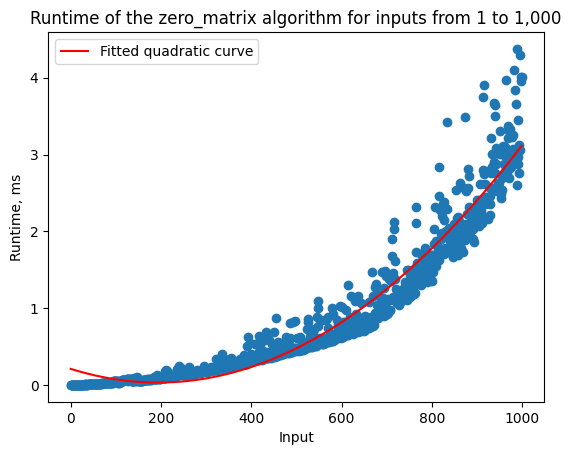

In [50]:
"""This code plots runtime against input size of the function zero_matrix."""

def zero_matrix(n):
    return [[0] * n for _ in range(n)] # Theta(n^2)

times = []
inputs = []

for i in range(1000):
    time = min(timeit.repeat(lambda: zero_matrix(i), number=1, repeat=5)) # this prevents huge outlier values by taking the minimum over several runs and disabling GC
    times.append(time)
    inputs.append(i)

x = np.array(inputs)
y = 1000 * np.array(times)
polynomial_model = np.poly1d(np.polyfit(x, y, 2))
plt.scatter(x, y)
plt.plot(x, polynomial_model(x), color='red', label='Fitted quadratic curve')

plt.title('Runtime of the zero_matrix algorithm for inputs from 1 to 1,000')
plt.xlabel('Input')
plt.ylabel('Runtime, ms')
plt.legend()

plt.show()

# Note the random outlying values I got when using just the time module are due to a few factors: 
# Garbage collection (automatic processes that allocate and reallocate memory periodically)
# OS scheduling (the CPU may switch to other processes)
# Memory allocation (if the list gets very large, the allocator may need to request a new memory page from the OS, which takes a while)
# I updated the code to prevent this. 

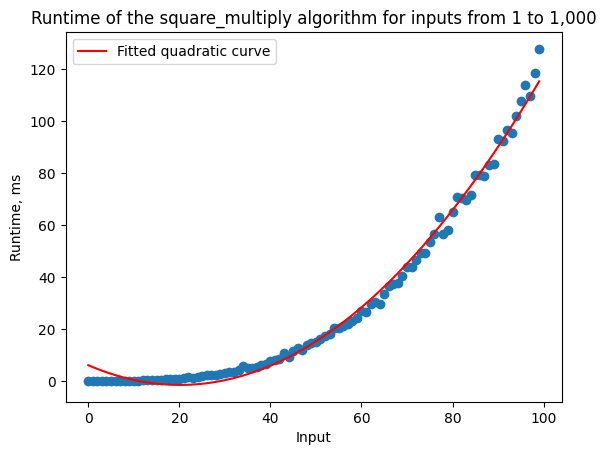

In [54]:
"""This code analyses the time complexity of the function square_multiply."""
def square_multiply(a, b):
    n = len(a) # constant time
    c = zero_matrix(n) # Theta(n^2) time
    for i in range(n): # Theta(n)
       for j in range(n): # Theta(n) again; so far Theta(n^2)
          for k in range(n): # Theta(n) again; so far Theta(n^3)
            c[i][j] += a[i][k] * b[k][j] # simple assignment and multiplication, so Theta(1)
    return c # Theta(1)

# Time complexity is n^2 + n^3, so algorithm is a member of Theta(n^2)
times = []
inputs = []

for n in range(100):
    a = [[random.randint(1, 100)] * n for _ in range(n)]
    b = [[random.randint(1, 100)] * n for _ in range(n)]
    time = min(timeit.repeat(lambda: square_multiply(a, b), number=1, repeat=5)) # this prevents huge outlier values by taking the minimum over several runs and disabling GC
    times.append(time)
    inputs.append(n)

x = np.array(inputs)
y = 1000 * np.array(times)
polynomial_model = np.poly1d(np.polyfit(x, y, 2))
plt.scatter(x, y)
plt.plot(x, polynomial_model(x), color='red', label='Fitted quadratic curve')

plt.title('Runtime of the square_multiply algorithm for inputs from 1 to 100')
plt.xlabel('Input')
plt.ylabel('Runtime, ms')
plt.legend()

plt.show() 

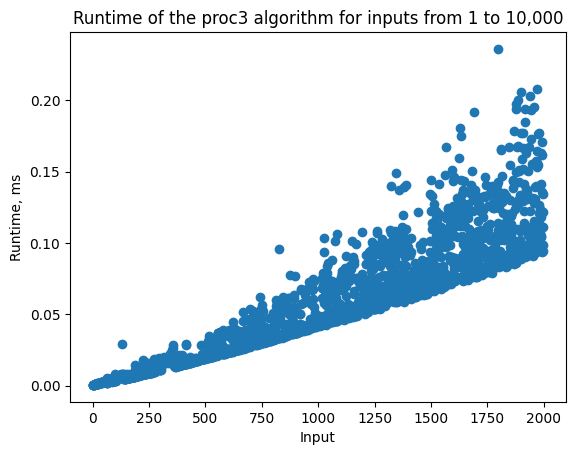

In [ ]:
"""This code analyses the time complexity of the function proc3."""

def proc3(list_a):
    list_b = list_a # Theta(1)
    n = len(list_b) # Theta(1)
    if n >= 2: # Theta(1)
        x = list_a[0] + list_a[1] # Theta(1)
    s = sum(list_b) # Theta(n) 
    return sorted(list_a) # O(n log n), Omega(n)

# Function is a member of Omega(n) and O(n log n)

times = []
inputs = []

for n in range(2000):
    list_a = [random.randint(1, 100) for _ in range(n)]
    time = min(timeit.repeat(lambda: proc3(list_a), number=1, repeat=5))
    times.append(time)
    inputs.append(n)

plt.scatter(np.array(inputs), 1000 * np.array(times))

plt.title('Runtime of the proc3 algorithm for inputs from 1 to 2000')
plt.xlabel('Input')
plt.ylabel('Runtime, ms')

plt.show()   

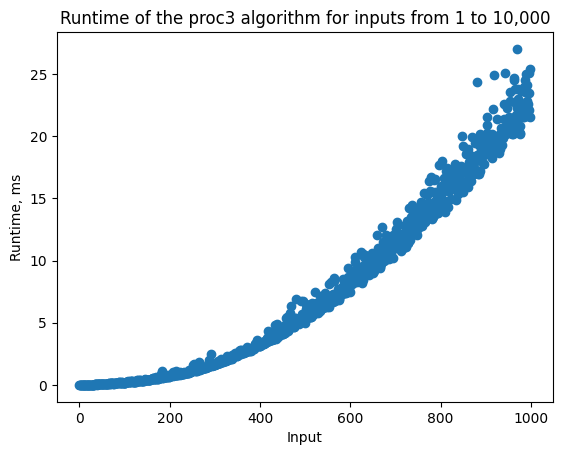

In [ ]:
"""This code analyses the time complexity of the function selection_sorted."""
def selection_sorted(input_list):
    alist = input_list[:] # Theta(n) because copies all elements
    for i in range(len(alist)): # Theta(n)
        min_index = i # Theta(1)
        for j in range(i+1, len(alist)): # Omega(1), O(n-1); T_AC = n/2
            if alist[j] < alist[min_index]: # Theta(1)
                min_index = j # Theta(1)
        alist[i], alist[min_index] = alist[min_index], alist[i] # Theta(1)
    return alist

# Time complexity in the set of Theta(n^2)

times = []
inputs = []

for n in range(1000):
    input_list = [random.randint(1, 100) for _ in range(n)]
    time = min(timeit.repeat(lambda: selection_sorted(input_list), number=1, repeat=5))
    times.append(time)
    inputs.append(n)

plt.scatter(np.array(inputs), 1000 * np.array(times))

plt.title('Runtime of the selection sort algorithm for inputs from 1 to 1,000')
plt.xlabel('Input')
plt.ylabel('Runtime, ms')

plt.show()   

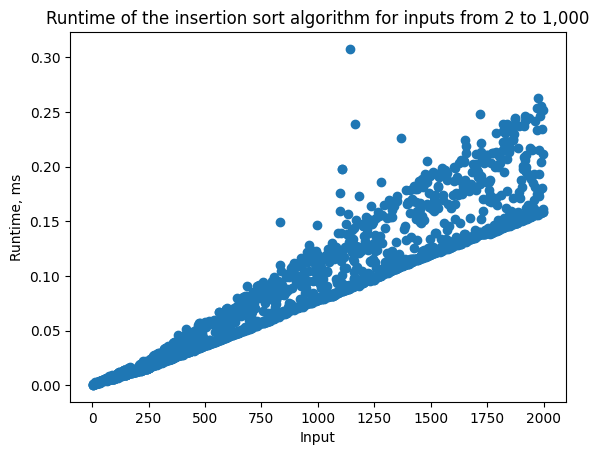

In [68]:
"""This code analyses the time complexity of the function insertion_sort."""
def insertion_sort(alist):
    # Moving right across the list
    for i in range(len(alist)): # Theta(n)
        # Store the ith value as a temporary variable
        a = alist[i] # Theta(1)
        # Initialise the pointer as i
        j = i # Theta(1)
        # Move left along the list; if a value to the left of the ith value is greater than it, shift it to the right
        while j >= 1 and alist[j-1] > a: # Theta(1) to check; this runs at least 0 times and at most i times; so is O(n)
            alist[j] = alist[j-1] # Theta(1)
            j -= 1 #Theta(1)
    # Put the ith value back where it belongs (in its original spot if no shifts were made, in its shifted spot if they were)
    alist[j] = a # Theta(1)

# Worst case: Theta(n^2), best case: Theta(n),  time function is in the set Omega(n) and O(n^2)

times = []
inputs = []

for n in range(2, 2000):
    alist = [random.randint(1, 100) for _ in range(n)]
    time = min(timeit.repeat(lambda: insertion_sort(alist), number=1, repeat=5))
    times.append(time)
    inputs.append(n)

plt.scatter(np.array(inputs), 1000 * np.array(times))

plt.title('Runtime of the insertion sort algorithm for inputs from 2 to 1,000')
plt.xlabel('Input')
plt.ylabel('Runtime, ms')

plt.show()   

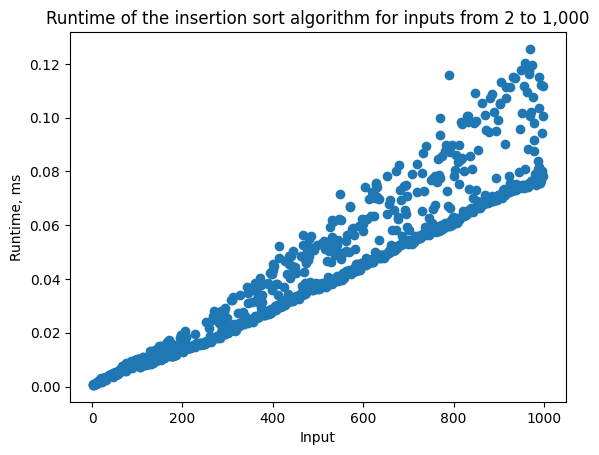

In [ ]:
"""This code analyses the time complexity of the function proc6."""
def proc6(a):
    if a[0] == 0: # Theta(1)
        return min(a) # Theta(n)
    else: 
        return selection_sorted(a) # Theta(n^2)
    
# Worst case: Theta(n^2), best case: Theta(n), time function is Omega(n) and O(n^2)

times = []
inputs = []

for n in range(1, 1000):
    a = [random.randint(0, 100) for _ in range(n)]
    time = min(timeit.repeat(lambda: insertion_sort(a), number=1, repeat=5))
    times.append(time)
    inputs.append(n)

plt.scatter(np.array(inputs), 1000 * np.array(times))

plt.title('Runtime of the proc6 algorithm for inputs from 2 to 1,000')
plt.xlabel('Input')
plt.ylabel('Runtime, ms')

plt.show()

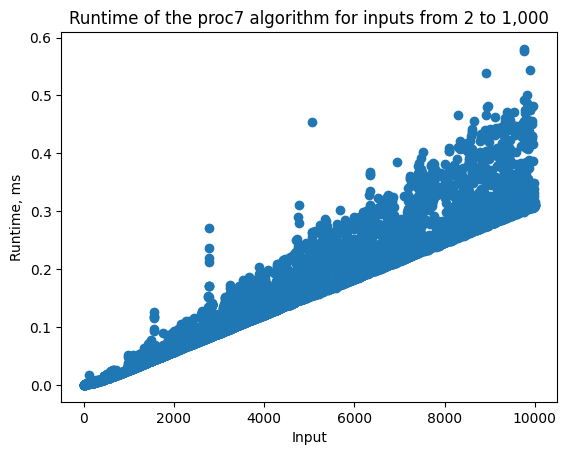

In [ ]:
"""This code analyses the time complexity of the function proc7."""
def proc7(n):
    r = 0 # Theta(1)
    while n > 1: # This will run n/2 times, so Theta(n) time
        r += 1 # Theta(1)
        n -= 2 # Theta(1)

# Time complexity is Theta(n)

times = []
inputs = []

for n in range(1, 10000):
    time = min(timeit.repeat(lambda: proc7(n), number=1, repeat=5))
    times.append(time)
    inputs.append(n)

plt.scatter(np.array(inputs), 1000 * np.array(times))

plt.title('Runtime of the proc7 algorithm for inputs from 1 to 10,000')
plt.xlabel('Input')
plt.ylabel('Runtime, ms')

plt.show()

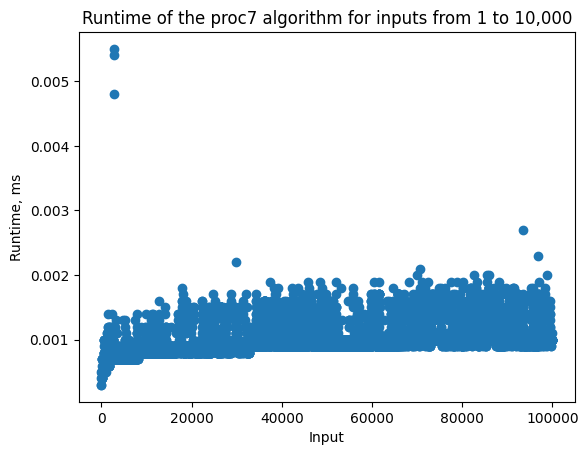

In [78]:
"""This code analyses the time complexity of the function proc8."""
def proc8(n):
    r = 0 # Theta(1)
    while n > 1: # Theta(log base 2 n), so Theta(log n)
        r += 1 # Theta(1)
        n //= 2 # Theta(1)

# Time complexity is Theta(log n)

times = []
inputs = []

for n in range(1, 100000, 10):
    time = min(timeit.repeat(lambda: proc8(n), number=1, repeat=5))
    times.append(time)
    inputs.append(n)

plt.scatter(np.array(inputs), 1000 * np.array(times))

plt.title('Runtime of the proc7 algorithm for inputs from 1 to 10,000')
plt.xlabel('Input')
plt.ylabel('Runtime, ms')

plt.show()

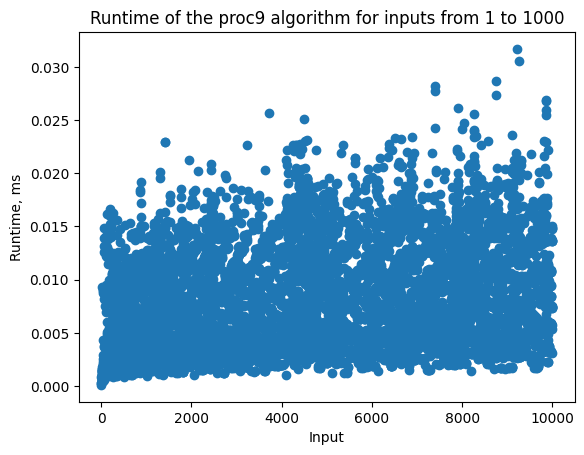

In [ ]:
"""This code analyses the time complexity of the function proc9."""
# Famous problem - Collatz conjecture
def proc9(n):
    while n > 1: # Best case is that n is a power of 2, meaning it will reach 1 in log 2,n steps, so Omega(log n)
                 # Upper bound is undefined. 
        if n % 2 == 0: # Theta(1)
            n //= 2 # Theta(1)
        else:
            n = 3 * n + 1 # Theta(1)

# Runtime is Omega(log n). 

times = []
inputs = []

for n in range(1, 10000):
    time = min(timeit.repeat(lambda: proc9(n), number=1, repeat=5))
    times.append(time)
    inputs.append(n)

plt.scatter(np.array(inputs), 1000 * np.array(times ))

plt.title('Runtime of the proc9 algorithm for inputs from 1 to 10,000')
plt.xlabel('Input')
plt.ylabel('Runtime, ms')

plt.show()